In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('aerofit_treadmill_data.csv')


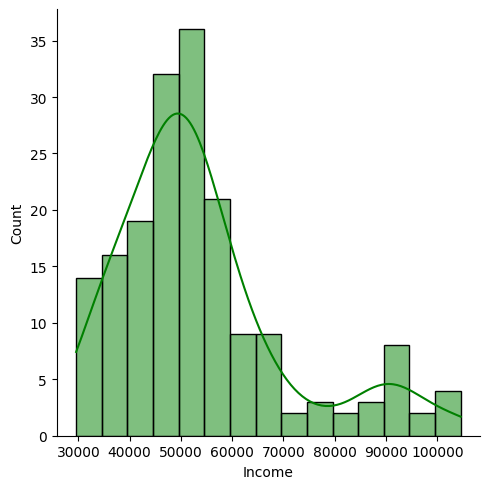

In [3]:
sns.displot(df['Income'], kde=True, color='green')

The graph shows a right skewed distribution potentially hinting at outliers affecting the data

<Axes: xlabel='Income'>

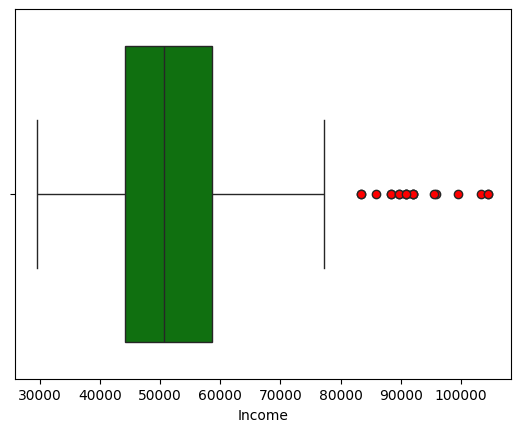

In [4]:
sns.boxplot(data=df, x='Income', color='green', flierprops=dict(markerfacecolor='r'))

Boxplot also confirms that the income column contains many outliers

Text(0.5, 1.0, 'Product and Income')

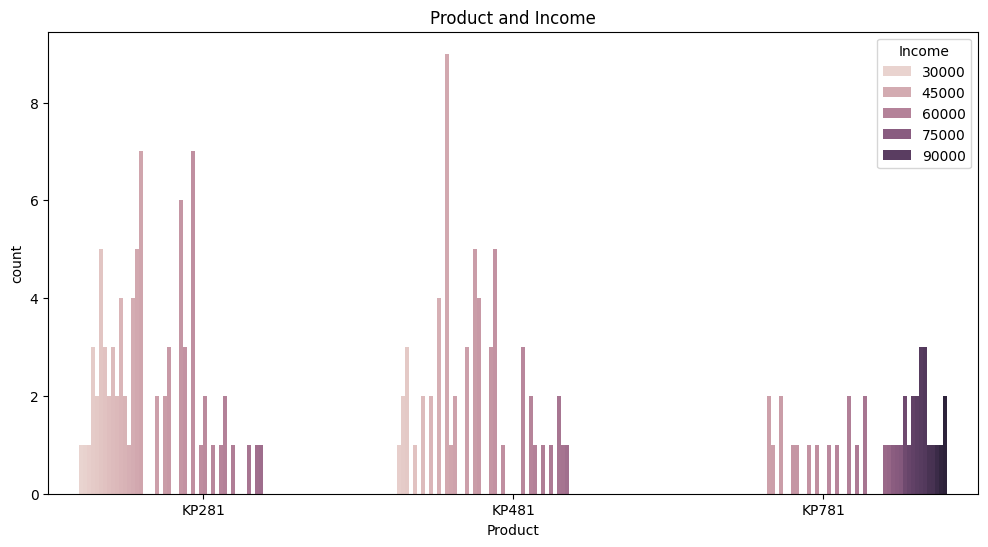

In [5]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Product', hue='Income')
plt.title('Product and Income')

This graph shows that the KP281 and KP481 attract more low to middle class customers ranging from 29,000 to 68,000. It also shows that the customers with a high income exclusively buy the KP781.

In [7]:
df_kp281 = df[df['Product']=='KP281']
df_kp281.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,80.000000,80.000000,80.000000,80.00000,80.00000,80.000000
mean,28.550000,15.037500,3.087500,2.96250,46418.02500,82.787500
std,7.221452,1.216383,0.782624,0.66454,9075.78319,28.874102
min,18.000000,12.000000,2.000000,1.00000,29562.00000,38.000000
25%,23.000000,14.000000,3.000000,3.00000,38658.00000,66.000000
50%,26.000000,16.000000,3.000000,3.00000,46617.00000,85.000000
75%,33.000000,16.000000,4.000000,3.00000,53439.00000,94.000000
max,50.000000,18.000000,5.000000,5.00000,68220.00000,188.000000


Text(0.5, 1.0, 'Product vs Income')

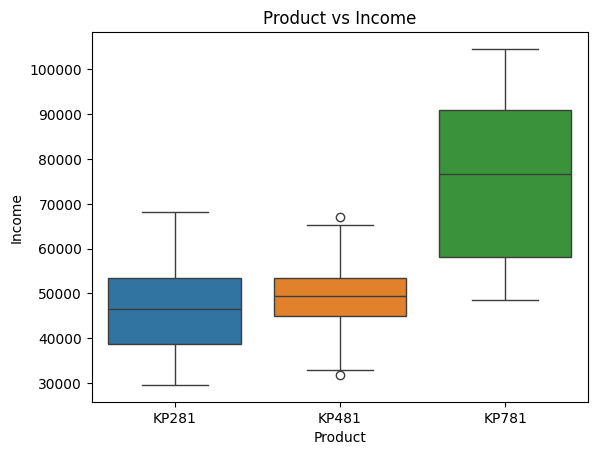

In [8]:
sns.boxplot(data=df, x='Product', y='Income', hue='Product')
plt.title('Product vs Income')

This graph also illustrates how income isn't a major factor when looking at the KP281 and KP481, but the probability of buying a KP781 increases as income increases

In [9]:
df_income_product = df.copy()
bins_income = [29000, 35000, 60000, 85000, 105000]
labels_income = ['Low Income','Lower-middle Income','Upper-Middle Income', 'High Income']
df_income_product['IncomeCategory'] = pd.cut(df_income_product['Income'],bins_income,labels = labels_income)
product_income = pd.crosstab(index=df_income_product['Product'], columns=[df_income_product['IncomeCategory']],margins=True)
product_income

IncomeCategory,Low Income,Lower-middle Income,Upper-Middle Income,High Income,All
Product,,,,,
KP281,8,66,6,0,80
KP481,6,47,7,0,60
KP781,0,11,12,17,40
All,14,124,25,17,180
